<a href="https://colab.research.google.com/github/tpessoa-dev/plataformas-cognitivas/blob/main/Plataformas_Azure_Face_Detecta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
!git clone https://github.com/elthonf/azure-ml.git

Cloning into 'azure-ml'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 105 (delta 41), reused 83 (delta 24), pack-reused 0
Receiving objects: 100% (105/105), 6.01 MiB | 22.97 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [ ]:
!pip install azure-cognitiveservices-vision-face
!pip install Pillow

     |████████████████████████████████| 71kB 2.9MB/s 
     |████████████████████████████████| 92kB 3.8MB/s 
     |████████████████████████████████| 51kB 2.9MB/s 


In [ ]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from PIL import Image, ImageDraw
import json


In [ ]:
def getRectangle(faceDictionary):
    """
    Função para criar um retângulo a partir de uma face identificada pelo Azure Face Detection
    :param faceDictionary:
    :return:
    """
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height

    return ((left, top), (right, bottom))

In [ ]:
def drawCrossesOnFace(faceLandmarks, size=2, color='white'):
    fl = faceLandmarks.as_dict()
    for l in fl.keys():
        x = fl[l]['x']
        y = fl[l]['y']
        draw.line(((x - size, y - size), (x + size, y + size)), fill=color)
        draw.line(((x - size, y + size), (x + size, y - size)), fill=color)
    pass

# Cliente de API

In [ ]:
KEY = "53b682dce6ed4398a6bc396ec2f6f697" #Coloque aqui sua chave
ENDPOINT = "https://face181818.cognitiveservices.azure.com/" #Coloque aqui seu endpoint (Ponto de Extremidade)
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

Experimente  mudar o arquivo abaixo

In [ ]:
imagefile = "./azure-ml/datasets/facial/face_unica.jpg"
with open(imagefile, 'r+b') as w:
    detected_faces = face_client.face.detect_with_stream(image=w)

In [ ]:
face.face_rectangle

# Simples

In [ ]:
img = Image.open(imagefile)
draw = ImageDraw.Draw(img)
for face in detected_faces:
    print("**** Detected face id [{0}] on : {1}".format(face.face_id, face.face_rectangle))
    draw.rectangle(getRectangle(face), outline='red')

**** Detected face id [30e51f2f-70bd-463e-9a0c-40ac08ac87e3] on : {'additional_properties': {}, 'width': 227, 'height': 227, 'left': 459, 'top': 124}


Exibe a imagem

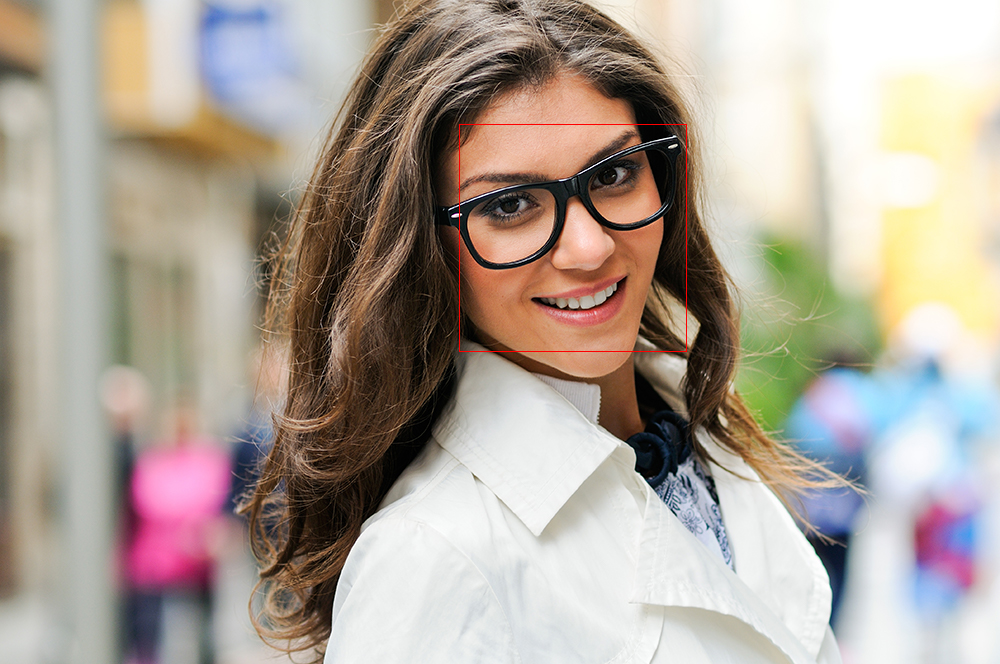

In [ ]:
img

# Full

In [ ]:
return_face_attributes = ["age", "gender", "headPose", "smile", "hair", "accessories", "facialHair", "glasses", "emotion",  "noise", "occlusion", "blur", "makeup"]
with open(imagefile, 'r+b') as w:
    detected_faces = face_client.face.detect_with_stream(image=w, return_face_landmarks = True, return_face_attributes = return_face_attributes)

In [ ]:
img = Image.open(imagefile)
draw = ImageDraw.Draw(img)
for face in detected_faces:
    print("**** Detected face id [{0}] on : {1}".format(face.face_id, face.face_rectangle))
    print("Landmarks: ")
    print(json.dumps(face.face_landmarks.as_dict(), indent=4) )
    print("Atributes: ")
    print(json.dumps(face.face_attributes.as_dict( ), indent=4) )
    draw.rectangle(getRectangle(face), outline='red')
    drawCrossesOnFace(face.face_landmarks, size=2, color='white')

**** Detected face id [af3bc354-9e52-437a-8d14-ccec51713be4] on : {'additional_properties': {}, 'width': 227, 'height': 227, 'left': 459, 'top': 124}
Landmarks: 
{
    "pupil_left": {
        "x": 504.4,
        "y": 202.8
    },
    "pupil_right": {
        "x": 607.7,
        "y": 175.9
    },
    "nose_tip": {
        "x": 598.5,
        "y": 250.9
    },
    "mouth_left": {
        "x": 527.7,
        "y": 298.9
    },
    "mouth_right": {
        "x": 626.4,
        "y": 271.5
    },
    "eyebrow_left_outer": {
        "x": 452.3,
        "y": 191.0
    },
    "eyebrow_left_inner": {
        "x": 531.4,
        "y": 180.2
    },
    "eye_left_outer": {
        "x": 487.6,
        "y": 207.9
    },
    "eye_left_top": {
        "x": 506.7,
        "y": 196.6
    },
    "eye_left_bottom": {
        "x": 506.8,
        "y": 212.9
    },
    "eye_left_inner": {
        "x": 526.5,
        "y": 204.3
    },
    "eyebrow_right_inner": {
        "x": 583.7,
        "y": 167.6
    },
    

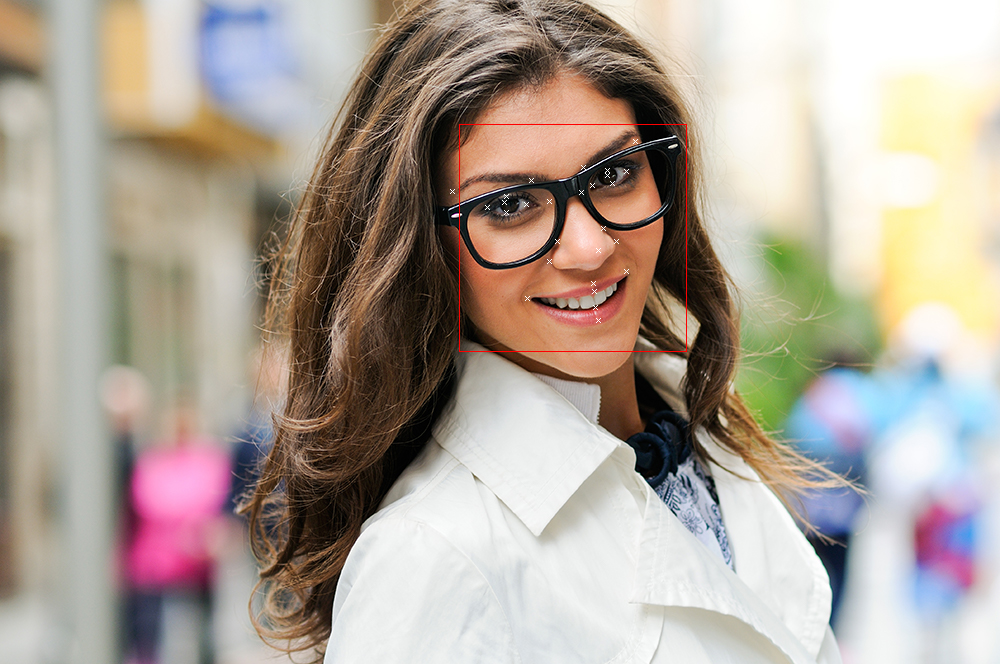

In [ ]:
img